In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('Bank Customer Churn Prediction.csv')

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
cat=[]
num=[]
for column in df.columns:
  if df[column].nunique()>10:
    num.append(column)
  else:
    cat.append(column)

To analyse the data as numaric and object that is catogeric.Split the numaric as 'num' and objects as 'cat'.

In [ ]:
cat

['country',
 'gender',
 'products_number',
 'credit_card',
 'active_member',
 'churn']

In [ ]:
num

['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

***Univariate analysis involves the exploration and analysis of a single variable or feature in a dataset.***

In [ ]:
# Descriptive statistics for a single variable
print(df['country'].describe())

count      10000
unique         3
top       France
freq        5014
Name: country, dtype: object


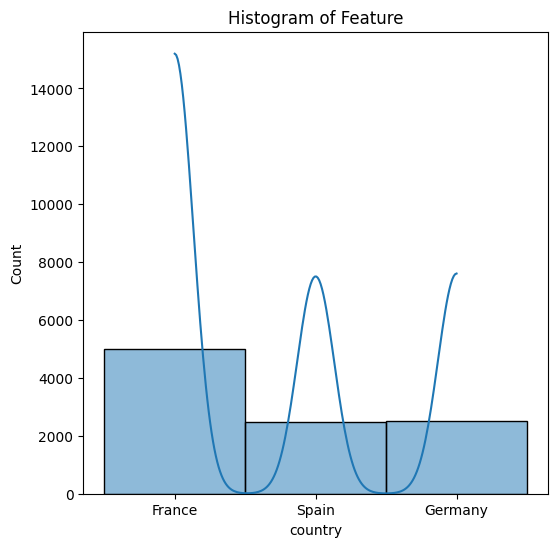

In [ ]:
# Histogram for a single variable
plt.figure(figsize=(6, 6))
sns.histplot(df['country'], kde=True)
plt.title('Histogram of Feature')
plt.show()

histogram analysis of a object "county".From the above hist we can see the representation of countries and count as leanerly wave.

<Axes: xlabel='country', ylabel='count'>

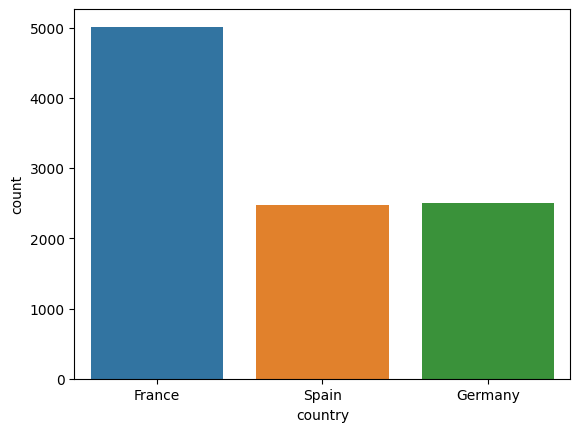

In [ ]:
sns.countplot(x='country',data = df)

The above shows the country distribution count.Hare the France have the maximum Distribution.

<Axes: xlabel='gender', ylabel='count'>

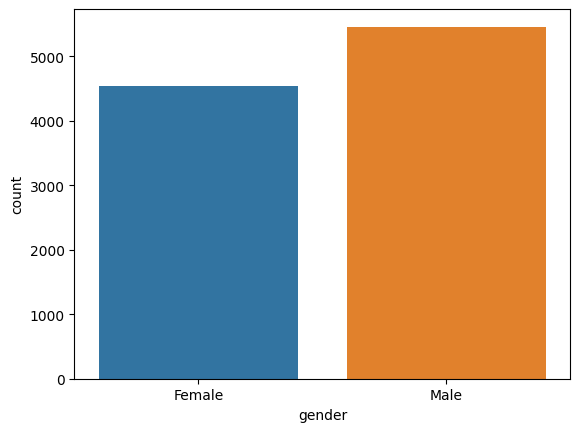

In [ ]:
sns.countplot(x='gender',data = df)



Below I will define a function which will generate plots for three numeric variables with stratification by selected categorical column.

In [ ]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(6,6))
    sns.scatterplot(x="balance",y="tenure", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="age",y="balance", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="age",y="balance",hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

At the beginning let’s look at scatter plots our 3 numerical variables stratified by gender.

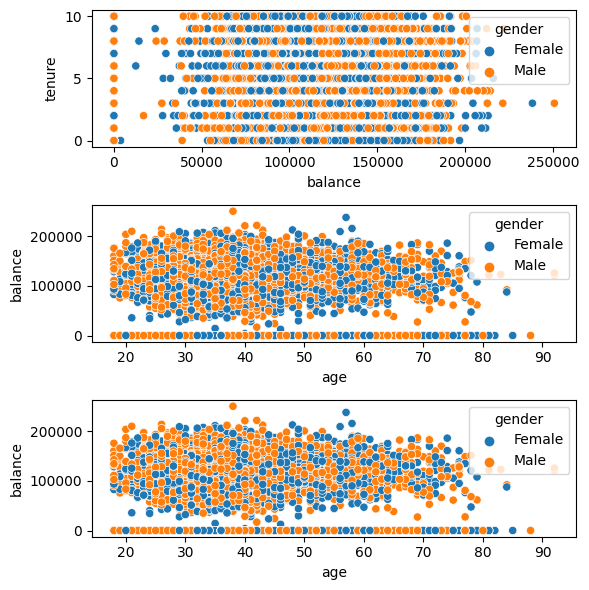

In [ ]:
scatters(df, h="gender")



The general impression is that women tend to be younger than men, however, the top plot shows that there is no clear difference between men and women in terms of amount and tenure of the credit. From visual inspection, it seems that there is some positive correlation between duration and amount of balance, what makes sense.



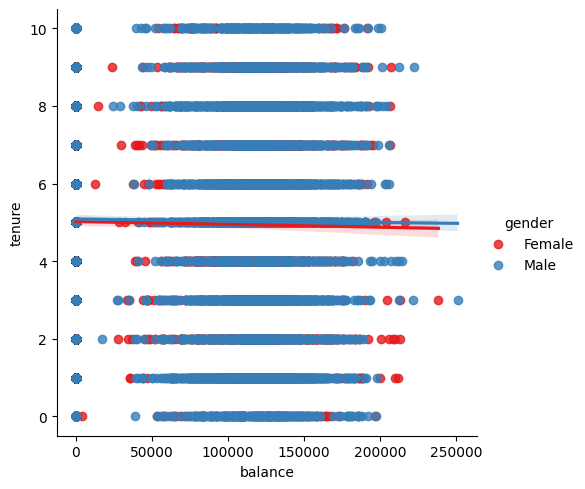

In [ ]:
sns.lmplot(x="balance",y="tenure", hue="gender", data=df, palette="Set1", aspect=1)
plt.show()

The plot above indicates that there is no significant difference between men and women

**Numaric value Analysis**

In [ ]:
df["age"].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: age, Length: 70, dtype: int64

<Axes: >

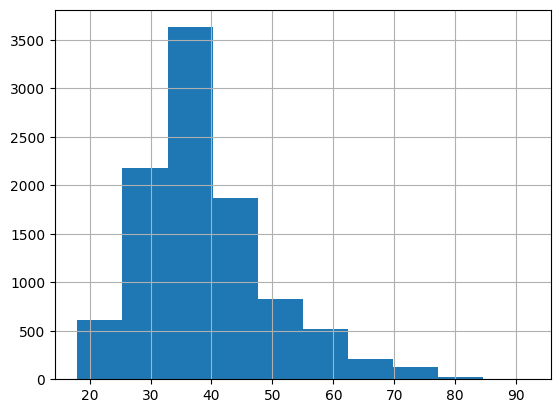

In [ ]:
df["age"].hist()

In [ ]:
df1=df.loc[df['churn']==1]

In [ ]:
corr_matrix=df.corr()

<ipython-input-29-a4bfebfd3231>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


In [ ]:
corr_matrix

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<ipython-input-31-f521e38b4e68>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['churn'].sort_values(ascending=False).plot(kind='bar')


<Axes: >

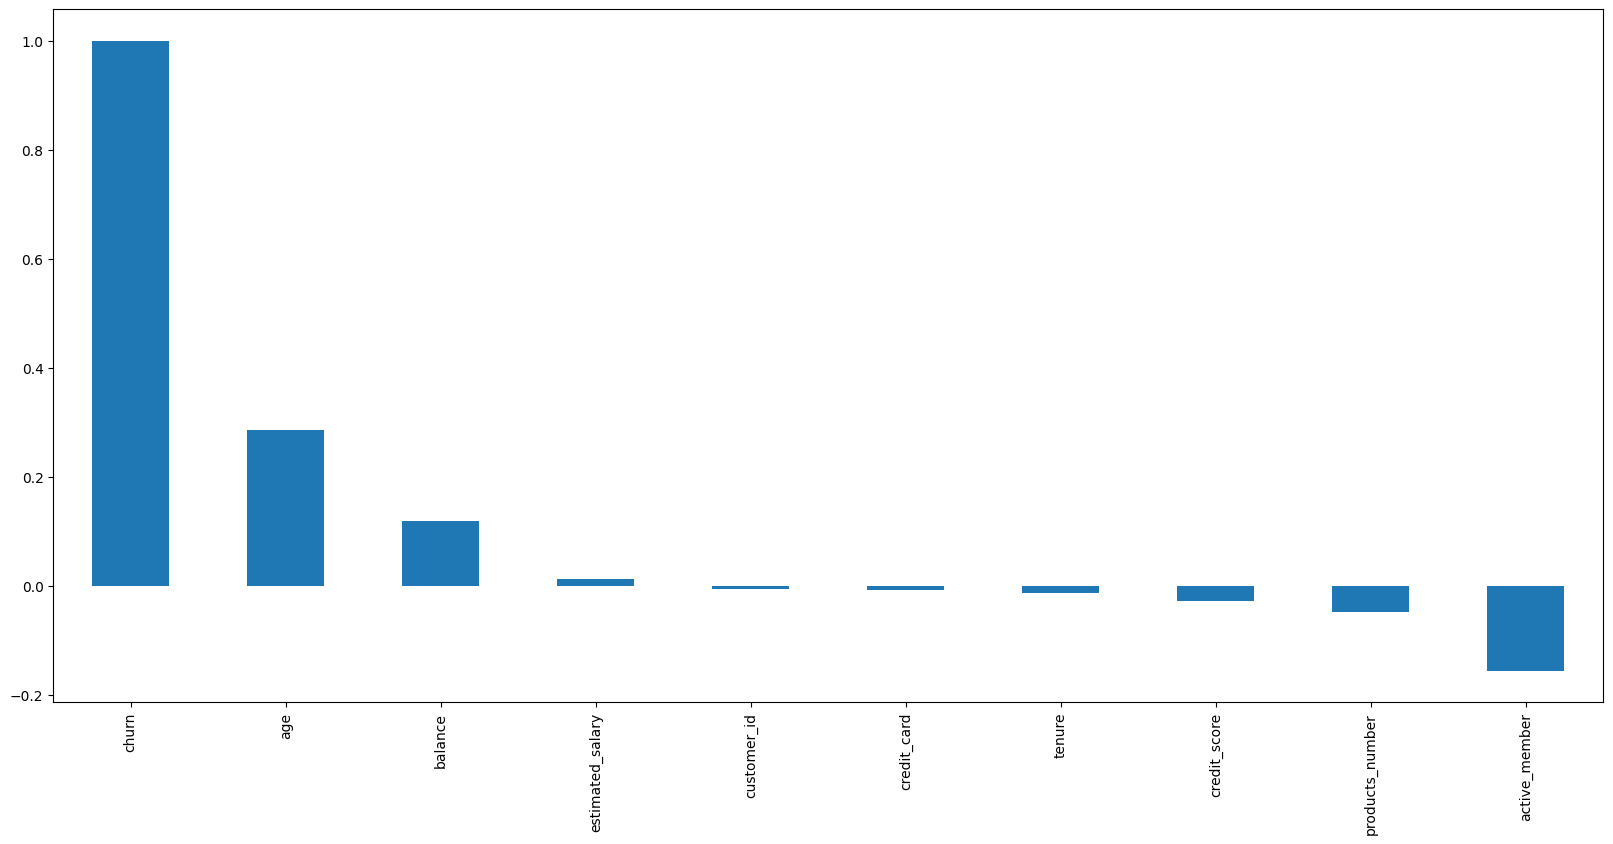

In [ ]:
plt.figure(figsize=[20,9])
df.corr()['churn'].sort_values(ascending=False).plot(kind='bar')

Correlation coefficients: the corelation matrix provides numarical ranges from -1 to 1.
Values closes to 1 indicates strong postive relationship (like propostionality). values closes to zero has no linear relationship between variables.

<Axes: >

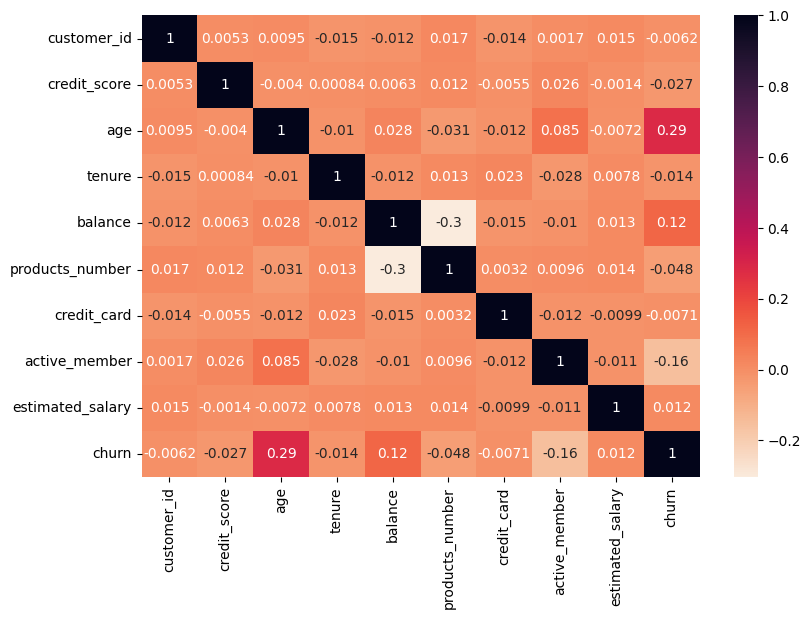

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='rocket_r')

It is a correlation matrix it shows the relation between all the dataframes compared to each other.When values close to -1 strong negative relationship.